In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [35]:
def logistic(P_0, r, K, nu = 1, T = 1000, dt = 0.1):
    P = np.zeros((T,))
    P[0] = P_0
    if isinstance(K, (float, int)):
      K = [K for _ in range(T)]
    else:
      K = [K(t) for t in range(T)]
    for t in range(T - 1):
      P[t + 1] = P[t] + r * P[t] * (1 - (P[t] / K[t])**nu) * dt    
    return P


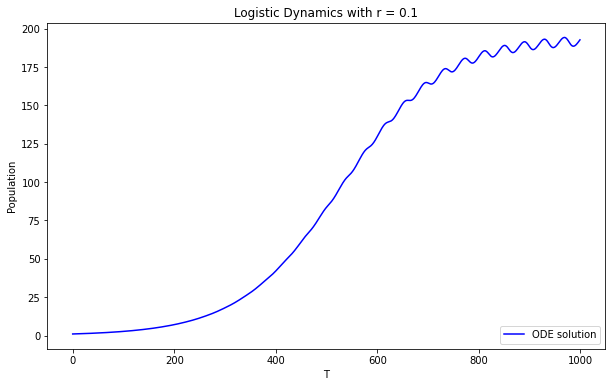

In [36]:
P_0 = 1
r = 0.1
def K(t):
  return 50 * (4 + np.sin( t / (2  * np.pi)))
P = logistic(P_0, r, K)

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(range(1000), P, color = "b", label = "ODE solution")
#plt.hlines(100, 0, 1000, label = rf"K = {K}", color = "r", linestyles = "dashed")
plt.title(rf"Logistic Dynamics with r = {r}")
plt.xlabel("T")
plt.ylabel("Population")
plt.legend(loc='lower right')
plt.show()

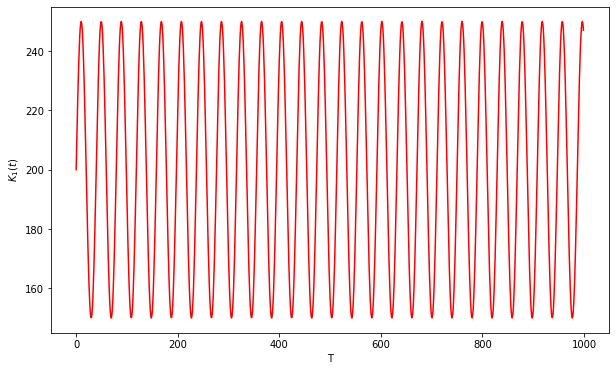

In [37]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(range(1000), [K(t) for t in range(1000)], color = "r")
plt.xlabel("T")
plt.ylabel(r"$K_1(t)$")
plt.show()

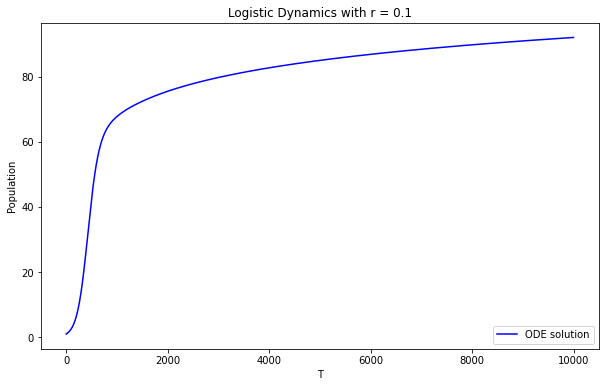

In [38]:
P_0 = 1
r = 0.1
def K(t):
  return 10 * np.log(2 + t)
P = logistic(P_0, r, K, 1, 10000)

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(range(10000), P, color = "b", label = "ODE solution")
#plt.hlines(100, 0, 1000, label = rf"K = {K}", color = "r", linestyles = "dashed")
plt.title(rf"Logistic Dynamics with r = {r}")
plt.xlabel("T")
plt.ylabel("Population")
plt.legend(loc='lower right')
plt.show()

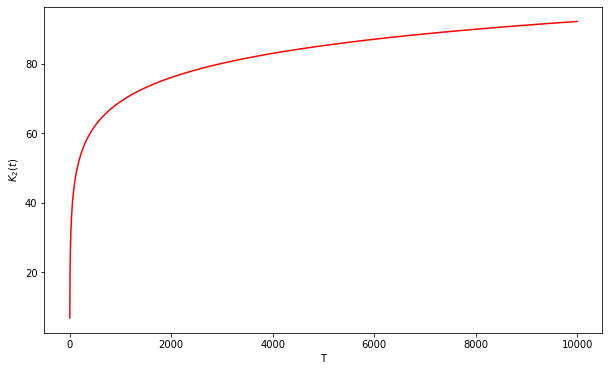

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(range(10000), [K(t) for t in range(10000)], color = "r")
plt.xlabel("T")
plt.ylabel(r"$K_2(t)$")
plt.show()

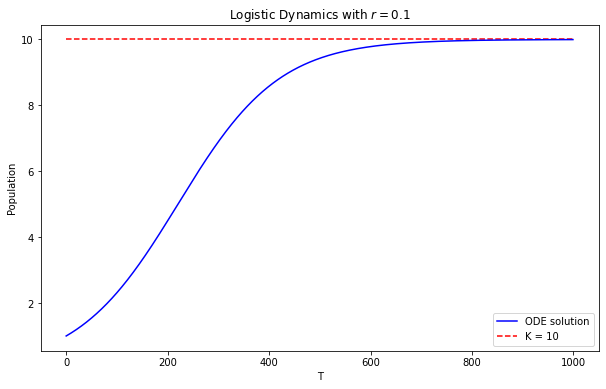

In [40]:
P_0 = 1
r = 0.1
K = 10
P = logistic(P_0, r, K)

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(range(1000), P, color = "b", label = "ODE solution")
plt.hlines(K, 0, 1000, label = rf"K = {K}", color = "r", linestyles = "dashed")
plt.title(rf"Logistic Dynamics with $r = {r}$")
plt.xlabel("T")
plt.ylabel("Population")
plt.legend(loc='lower right')
plt.show()

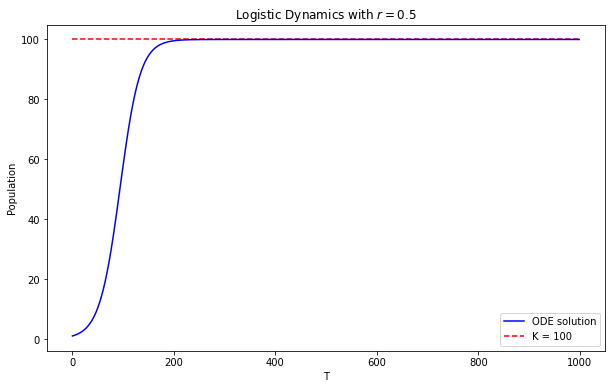

In [41]:
P_0 = 1
r = 0.5
K = 100
P = logistic(P_0, r, K)

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(range(1000), P, color = "b", label = "ODE solution")
plt.hlines(100, 0, 1000, label = rf"K = {K}", color = "r", linestyles = "dashed")
plt.title(rf"Logistic Dynamics with $r = {r}$")
plt.xlabel("T")
plt.ylabel("Population")
plt.legend(loc='lower right')
plt.savefig(f'logistic_{r}_{K}.jpg')

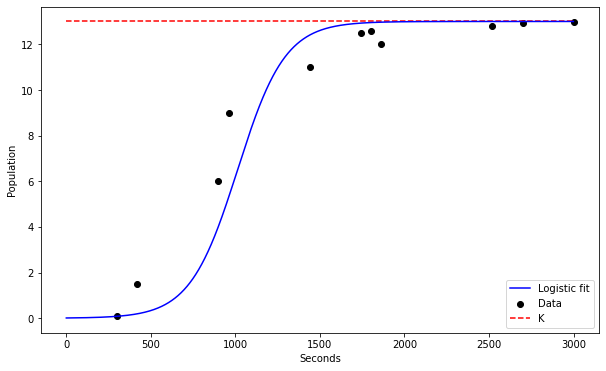

In [42]:
X = np.array([5, 7, 15, 16, 24, 29, 30, 31, 42, 45, 50]) * 60
Y = np.array([0.1, 1.5, 6, 9, 11, 12.5, 12.6, 12, 12.8, 12.95, 12.99] , dtype = 'float64') 
P = logistic(0.01, 0.071, 13, 1, 3000)

fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(X, Y, color = "black", label = "Data")
plt.plot(range(3000), P, color = "b", label = "Logistic fit")
plt.hlines(13, 0, 3000, linestyles = "dashed", color = "r", label = "K")
plt.ylabel("Population")
plt.xlabel("Seconds")
plt.legend(loc = 'lower right')
plt.show()

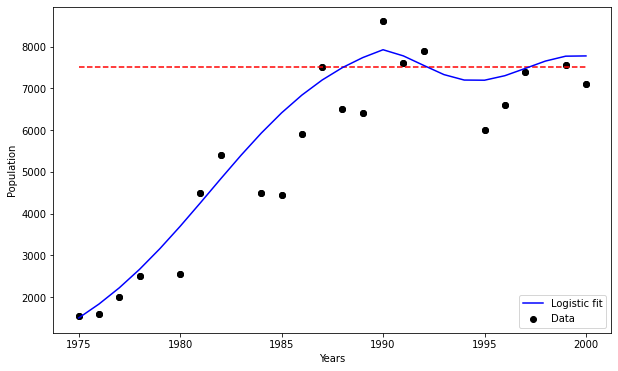

In [43]:
X = [1975, 1976, 1977, 1978, 1980, 1981, 1982, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1995, 1996, 1997, 1999, 2000]
Y = [1550, 1600, 2000, 2500, 2550, 4500, 5400, 4500, 4450, 5900, 7500, 6500, 6400, 8600, 7600, 7900, 6000, 6600, 7400, 7550, 7100]

def K(t):
  if t < 15:
    return 8500
  return 7500 + 700 * (np.sin(4 * t / (2 * np.pi)))

P = logistic(1500, 270, K, 1, 26, dt = 0.001)

fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(X, Y, color = "black", label = "Data")
plt.plot(range(1975, 2001), P, color = "b", label = "Logistic fit")
plt.scatter(X, Y, color = "black")
plt.hlines(7500, 1975, 2000, linestyles = "dashed", color = "r")
plt.ylabel("Population")
plt.xlabel("Years")
plt.legend(loc = 'lower right')
plt.show()

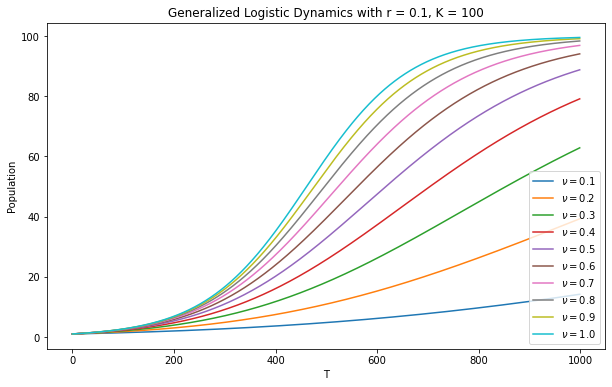

In [45]:
P_0 = 1
r = 0.1

K = 100

fig, ax = plt.subplots(figsize = (10, 6))
for nu in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  P = logistic(P_0, r, K, nu)
  plt.plot(range(1000), P, label = rf"$\nu = {nu}$")
plt.title(rf"Generalized Logistic Dynamics with r = {r}, K = {K}")
plt.xlabel("T")
plt.ylabel("Population")
plt.legend(loc='lower right')
plt.show()

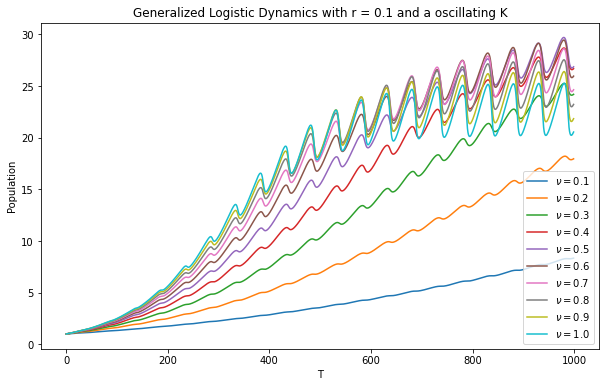

In [46]:
P_0 = 1
r = 0.1

def K(t):
  return 50 * (1.1 + np.sin( 2 * np.pi * t / 50))

fig, ax = plt.subplots(figsize = (10, 6))
for nu in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  P = logistic(P_0, r, K, nu)
  plt.plot(range(1000), P, label = rf"$\nu = {nu}$")
plt.title(rf"Generalized Logistic Dynamics with r = {r} and a oscillating K")
plt.xlabel("T")
plt.ylabel("Population")
plt.legend(loc='lower right')
plt.show()